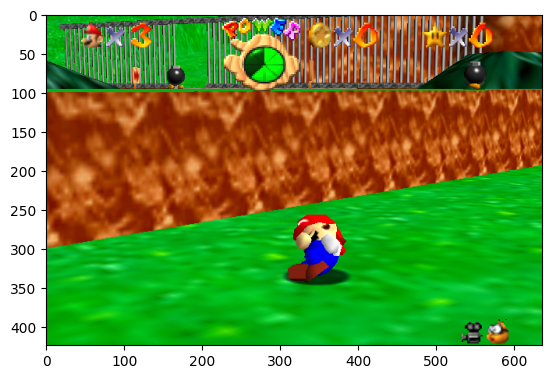

In [1]:
import cv2
import mss
import numpy as np
import matplotlib.pyplot as plt
from Constants import Constants

%matplotlib inline

sct = mss.mss()

def get_state():
    sct_img = sct.grab(Constants.MONITOR)
    return cv2.cvtColor(np.asarray(sct_img, dtype=np.uint8), cv2.COLOR_RGB2BGR)

screen = get_state()

plt.imshow(screen)

# If needed, train a new YoloV8 model.

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

model.train(data="./YoloV8/data.yaml", 
            epochs=100, 
            imgsz=640, 
            batch=32,
            optimizer="AdamW",
            amp=True)

# Test the YoloV8 model on various images to make sure it is working correctly.

In [ ]:
model = YOLO('YoloV8/weights/best.pt')
preds = model.predict(screen[:,:,::-1])


for pred in preds[0].cpu().boxes.data.numpy():
    print(f"x1: {pred[0]} | y1: {pred[1]} | x2: {pred[2]} | y2: {pred[3]} | confidence: {pred[4]} | class: {pred[5]}")

    area = (pred[2] - pred[0]) * (pred[3] - pred[1])

    print(area)